In [531]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib notebook

In [1140]:
import re
prefix="./Source_Phobyhalf40/Phobyhalf40_1231_1658_"
fName=prefix+"parameters.dat"
print(fName)
row=0
param=open(fName,"r")
for line in param:
    splitted=re.split('[: ]',line)
    print(splitted)
    row+=1
    if splitted[0]=="FLP":
        FLP=splitted[1]
        BP=splitted[3]
        RBP=splitted[5]
        break
FLP=int(FLP)
BP=int(BP)
RBP=int(RBP)
print(FLP, BP, RBP)
print(FLP+BP+4)

for line in param:
    print(line)

./Source_Phobyhalf40/Phobyhalf40_1231_1658_parameters.dat
['Source', 'Image', 'Phobyhalf40.png\n']
['FLP', '632', 'BP', '600', 'OBP', '1\n']
632 600 1
1236
Impact Velocity:0.000000 Angle of Incident:1.570796

XSIZE:200 YSIZE:150

interval:0.100000 Bucket Length0.300000

MAX_X:40 MIN_X:-20 MAX_Y:40 MIN_Y:-10

ENLARGEMENT RATIO 3.00 

CONTACT_ANGLE 1.047198

FLUID_INTERACTION:60.000000 HPHILY_INTERACTION:30.000000 HPHOBY_INTERACTION:-30.000000

BOUNDARY_FORCE:0

cs:80.00 m:2.617994 rigidMass:7.853982 h_smooth:0.100000 rho0:1000.000000 dt:0.00010000 kappa:10.000000 nu:0.020000 g:9.800000 T:50000 

DAMPTIME:5000 MOTION_START_TIME:10000





Calculation started:2018/12/31 Mon 16:58:23

Calculation finished:2018/12/31 Mon 17:04:53



In [1141]:
import sys

fName=prefix+"data.dat"
readFile = open(fName,"r")
spaceCount=0
indexCount=0
pIndex=0
targetIndex=1001
array =np.zeros((FLP,10))
arrayRigid=np.zeros((RBP, 10))
arrayWall=np.zeros((BP, 10))

for line in readFile:
    if line=='\n':
        spaceCount+=1
    if indexCount==targetIndex and spaceCount==0:
        splitted=line.split()
        for j in range(10):
            array[pIndex][j]=splitted[j]
        pIndex+=1
    if spaceCount==2:
        indexCount+=1
        spaceCount=0
    if indexCount>targetIndex:
        break
print(pIndex)
readFile.close()

px=np.zeros(FLP)
py=np.zeros(FLP)
vx=np.zeros(FLP)
vy=np.zeros(FLP)
vabs=np.zeros(FLP)
rho=np.zeros(FLP)
for i in range(FLP):
    px[i]=array[i][1]
    py[i]=array[i][2]
    vx[i]=array[i][3]
    vy[i]=array[i][4]
    vabs[i]=array[i][5]
    rho[i]=array[i][6]


#Rigid Body
spaceCount=0
indexCount=0
pIndex=0
readFile = open(fName,"r")
for line in readFile:
    if line=='\n':
        spaceCount+=1
    if indexCount==targetIndex+1 and spaceCount==0:
        splitted=line.split()
        for j in range(10):
            arrayRigid[pIndex][j]=splitted[j]
        pIndex+=1
    if spaceCount==2:
        indexCount+=1
        spaceCount=0
    if indexCount>targetIndex+1:
        break

readFile.close()
rpx=np.zeros(RBP)
rpy=np.zeros(RBP)
rvx=np.zeros(RBP)
rvy=np.zeros(RBP)
rvabs=np.zeros(RBP)
for i in range(RBP):
    rpx[i]=arrayRigid[i][1]
    rpy[i]=arrayRigid[i][2]
    rvx[i]=arrayRigid[i][3]
    rvy[i]=arrayRigid[i][4]
    rvabs[i]=arrayRigid[i][5]
print(pIndex)

#wall 
spaceCount=0
indexCount=0
pIndex=0
readFile = open(fName,"r")
for line in readFile:
    if line=='\n':
        spaceCount+=1
    if spaceCount!=0:
        break;
    splitted=line.split()
    for j in range(10):
        arrayWall[pIndex][j]=splitted[j]
    pIndex+=1
   
bpx=np.zeros(BP)
bpy=np.zeros(BP)
bvx=np.zeros(BP)
bvy=np.zeros(BP)
bvabs=np.zeros(BP)
for i in range(BP):
    bpx[i]=arrayWall[i][1]
    bpy[i]=arrayWall[i][2]
    bvx[i]=arrayWall[i][3]
    bvy[i]=arrayWall[i][4]
    bvabs[i]=arrayWall[i][5]
print(pIndex)

632
1
600


['.', 'Source_Phobyhalf40', 'Phobyhalf40_1231_1658_']
Phobyhalf40_1231_1658


<IPython.core.display.Javascript object>


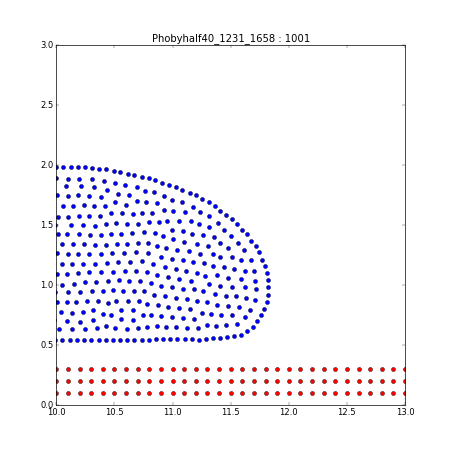

/home/michinori/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [1145]:
splitted=prefix.split("/")
print(splitted)
graphTitle=splitted[2]
graphTitle=graphTitle.rstrip("_")
print(graphTitle)

plt.figure(figsize=(9,9), dpi=50)
#q=plt.quiver(px, py, vx, vy, vabs, color='red', angles='xy', width=0.005, cmap=plt.cm.jet)
plt.plot(px, py, "o", color="blue")
plt.plot(bpx, bpy, "o", color='red')
plt.plot(rpx, rpy, "o", color="yellow")
plt.title("%s : %s"%(graphTitle, targetIndex))
plt.ylim(0,3)
plt.xlim(10,13)
#plt.colorbar(q, cmap=plt.cm.jet)
#plt.gca().set_aspect('equal', adjustable='box')
tang_spec=np.pi/3.0
tang=1.3
line_x=np.arange(11.0, 14.0, 0.01)
line_yspec=(-11.6+line_x)*tang_spec+0.52
line_y=(-11.6+line_x)*tang+0.52
#plt.plot(line_x, line_yspec,"g-",lw=5, label="%.02f"%(tang_spec))
#plt.plot(line_x, line_y, "y-", lw=5, label="%.02f"%(tang))
plt.legend()
plt.show()


In [1146]:
splitted=fName.split("/")
print(splitted)
print(splitted[0])
s="./%s/%s"%(splitted[1],splitted[2])
imgName=s
print(imgName)
imgName=imgName.rstrip(".dat")
s=("%d_.png"%(targetIndex))
imgName=imgName+s
print(imgName)
plt.savefig(imgName)

['.', 'Source_Phobyhalf40', 'Phobyhalf40_1231_1658_data.dat']
.
./Source_Phobyhalf40/Phobyhalf40_1231_1658_data.dat
./Source_Phobyhalf40/Phobyhalf40_1231_1658_1001_.png


In [179]:
for i in range(FLP):
    if py[i]<-1:
        vx[i]=0
        vy[i]=0
        print(i)

print(np.average(vx))
print(np.average(vy))

rms_vx=0
rms_vy=0
for i in range(FLP):
    rms_vx+=vx[i]*vx[i]
    rms_vy+=vy[i]*vy[i]

print("root mean square")
rms_vx=np.sqrt(rms_vx/float(FLP))
rms_vy=np.sqrt(rms_vy/float(FLP))

print(rms_vx, rms_vy)

-7.21702984554e-05
-0.0371725221976
root mean square
0.0703226187385 0.0828276075092


In [322]:
sc=plt.scatter(px, py, c=fp, cmap=cm.seismic)
plt.colorbar(sc)
plt.show()

In [104]:
plt.colorbar?

In [15]:
test=open("analyzerTest.dat","w")
for i in range(7):
    for j in range(3):
        string='%d %d.%d %d.%d %d.%d\n'%(i+1, (j)*10,i+1, (j+1)*10,i+1, (j+2)*100,i+1)
        test.write(string)
    string='\n\n'
    test.write(string)
test.close()

In [446]:
print (np.mean(rho))

1006.95919329


In [1087]:
print(np.pi/6.0)

0.5235987755982988


In [1030]:
v_ini_num=np.zeros(8)
U_ini_num=np.zeros(8)
v_ini_expr=np.zeros(8)
g=9.8
D_num=1.0
D_expr=0.02
for i in range(8):
    v_ini_num[i]=10.0*(i+1)

for i in range(8):
    U_ini_num[i]=v_ini_num[i]*np.sqrt(D_num/g)/D_num
    
for i in range(8):
    v_ini_expr[i]=U_ini_num[i]*D_expr/np.sqrt(D_expr/g)

In [1031]:
print(v_ini_num)
print(U_ini_num)
print(v_ini_expr)

[ 10.  20.  30.  40.  50.  60.  70.  80.]
[  3.19438282   6.38876565   9.58314847  12.7775313   15.97191412
  19.16629695  22.36067977  25.5550626 ]
[  1.41421356   2.82842712   4.24264069   5.65685425   7.07106781
   8.48528137   9.89949494  11.3137085 ]


In [1036]:
for i in range(8):
    s="%.02f & %.02f & %.02f \ \hline"%(v_ini_num[i], U_ini_num[i], v_ini_expr[i])
    print(s)

10.00 & 3.19 & 1.41 \ \hline
20.00 & 6.39 & 2.83 \ \hline
30.00 & 9.58 & 4.24 \ \hline
40.00 & 12.78 & 5.66 \ \hline
50.00 & 15.97 & 7.07 \ \hline
60.00 & 19.17 & 8.49 \ \hline
70.00 & 22.36 & 9.90 \ \hline
80.00 & 25.56 & 11.31 \ \hline
